# Chapter 10 - Unsupervised Learning 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/master/Notebooks'

## 10.1: Principal Component Analysis

### Data preparation

In [2]:
df = pd.read_csv(f'{BASE_DIR}/Data/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# standardize a dataset (center to the mean and component wise scale to unit variance)
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

Why scale? (from lecture slide p19)
<img src='https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/10-2.png' />

### Print loading vectors (weights for each component)

In [4]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [5]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head(5)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


### Plot two principal components 

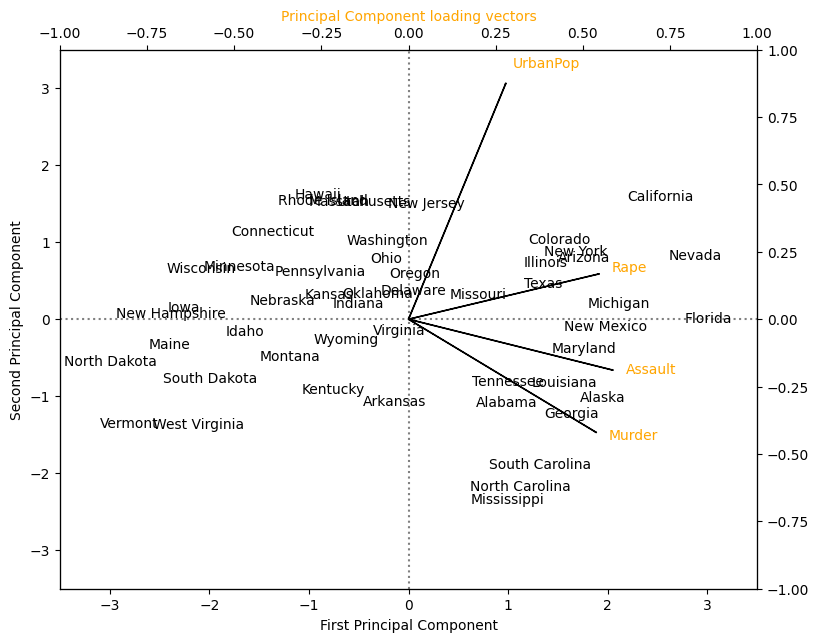

In [6]:
fig, ax1 = plt.subplots(figsize=(9, 7))

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings.index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i] * a, -pca_loadings.PC2.loc[i] * a), color='orange')

# Plot vectors
for i in range(4):
    ax2.arrow(0, 0, pca_loadings.PC1[i], -pca_loadings.PC2[i])

### Explained variance of each components

In [7]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [8]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [9]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

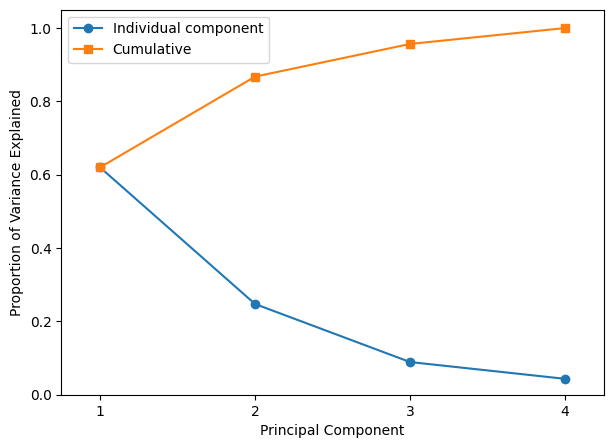

In [10]:
plt.figure(figsize=(7, 5))

plt.plot([1, 2, 3, 4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4])
plt.legend(loc=2)

## 10.2: Clustering

### 10.2.1 K-Means Clustering

### Generate data

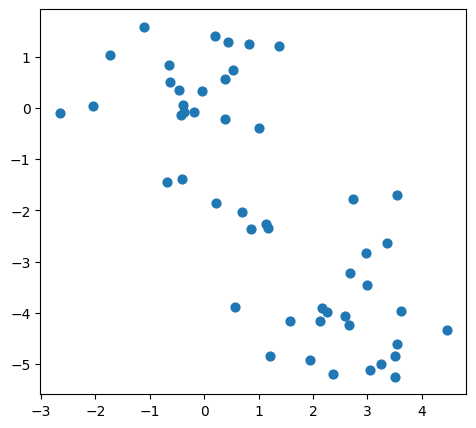

In [11]:
np.random.seed(2)
X = np.random.standard_normal((50, 2))
X[:25, 0] = X[:25, 0] + 3
X[:25, 1] = X[:25, 1] - 4

plt.figure(figsize=(5.5, 5))
plt.scatter(X[:, 0], X[:, 1], s=40)

In [12]:
### Fit the k-means 
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [13]:
km1.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

In [14]:
km1.inertia_

99.30578397914684

In [15]:
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)
km2.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int32)

In [16]:
km2.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [-0.27876523,  0.51224152],
       [ 0.69945422, -2.14934345]])

In [17]:
km2.inertia_

68.97379200939724

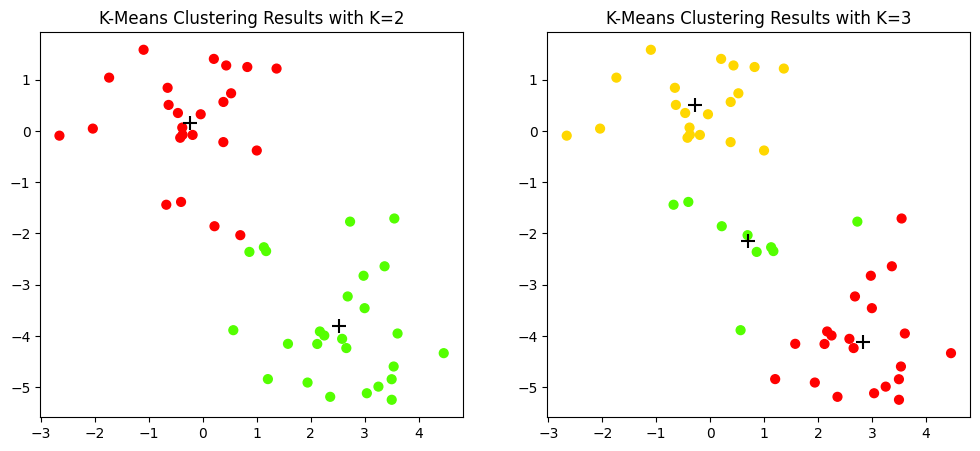

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title('K-Means Clustering Results with K=2')
ax2.set_title('K-Means Clustering Results with K=3')

# Color the data with the cluster labels
ax1.scatter(X[:, 0], X[:, 1], s=40, c=km1.labels_, cmap=plt.cm.prism)
ax1.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s=100, c='k', marker='+')
ax2.scatter(X[:, 0], X[:, 1], s=40, c=km2.labels_, cmap=plt.cm.prism)
ax2.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s=100, c='k', marker='+')

### Exercise: Try Yourself!

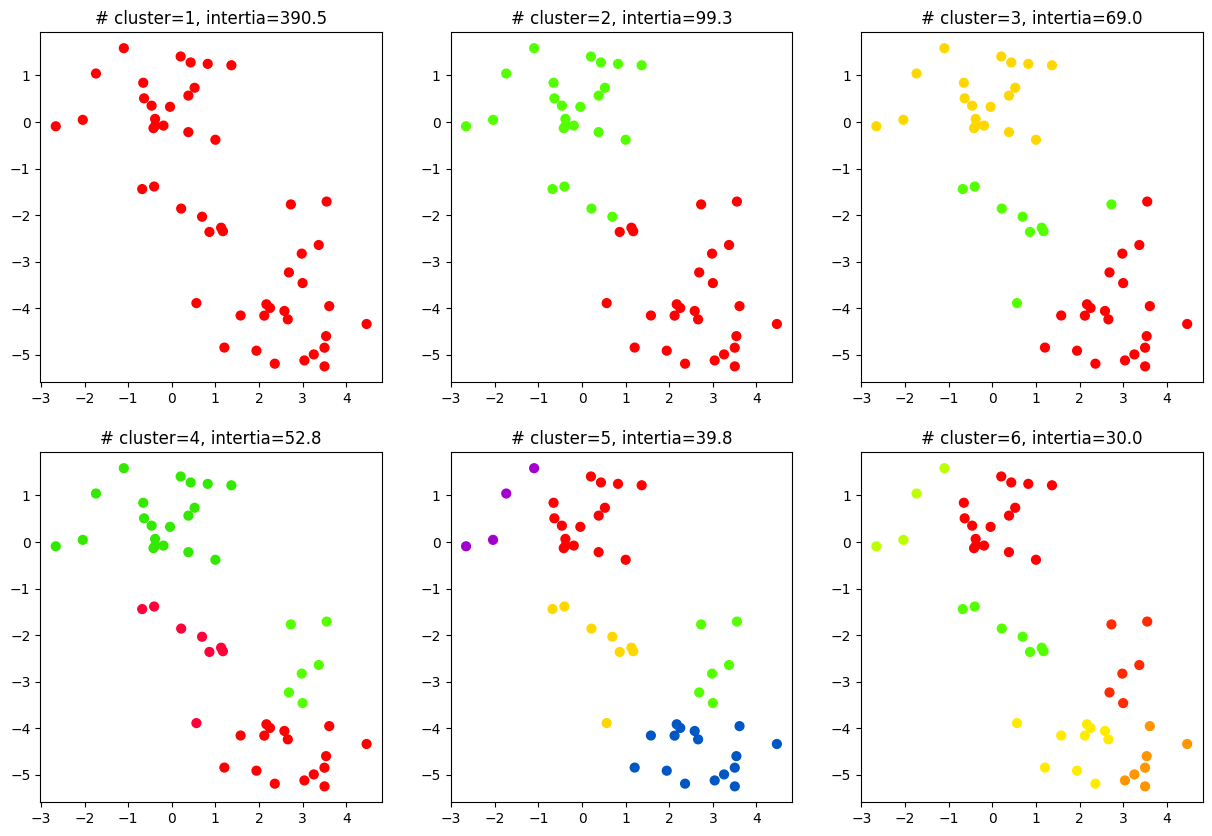

In [19]:
kms = [KMeans(n_clusters=n).fit(X) for n in range(1, 10)]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, (j, k) in enumerate([(j, k) for j in range(2) for k in range(3)]):
    # Show inertia of each kmeans
    ax[j][k].set_title('# cluster={}, intertia={:.01f}'.format(kms[i].n_clusters, kms[i].inertia_))
    # Plot clustered data
    ax[j][k].scatter(X[:, 0], X[:, 1], s=40, c=kms[i].labels_, cmap=plt.cm.prism) 

### Correlation between inertia and number of clusters

Text(0, 0.5, 'inertia')

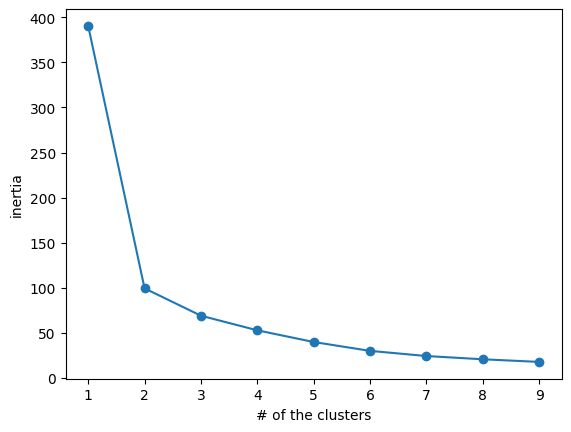

In [20]:
inertias = [KMeans(n_clusters=n).fit(X).inertia_ for n in range(1, 10)]
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('# of the clusters')
plt.ylabel('inertia')

### Meanings of n_init and init parameters

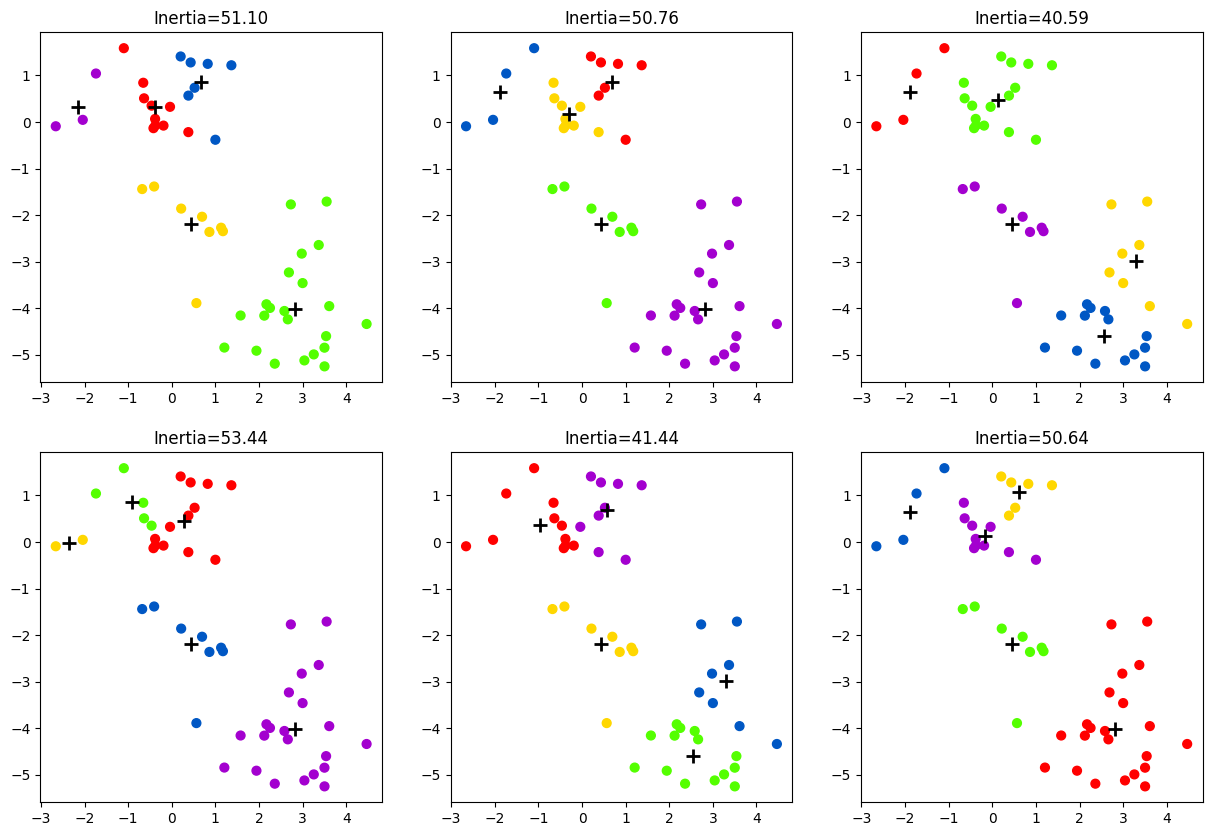

In [21]:
kms = [KMeans(n_clusters=5, n_init=1, init='random').fit(X) for _ in range(6)]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, (j, k) in enumerate([(j, k) for j in range(2) for k in range(3)]):
    km = kms[i]
    ax[j][k].scatter(X[:, 0], X[:, 1], s=40, c=km.labels_, cmap=plt.cm.prism)
    ax[j][k].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', s=100, c='k', linewidth=2)
    ax[j][k].set_title('Inertia={:.2f}'.format(km.inertia_))

Text(0.5, 1.0, 'Inertia=39.80')

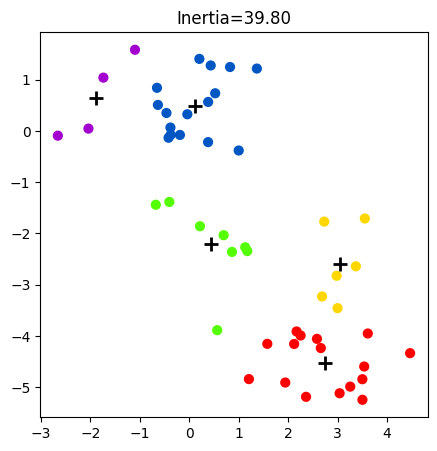

In [22]:
km = KMeans(n_clusters=5, n_init=10, init='random').fit(X)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=40, c=km.labels_, cmap=plt.cm.prism)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', s=100, c='k', linewidth=2)
ax.set_title('Inertia={:.2f}'.format(km.inertia_))

### 10.2.2 Hierarchical Clustering

Text(0.5, 1.0, 'Single Linkage')

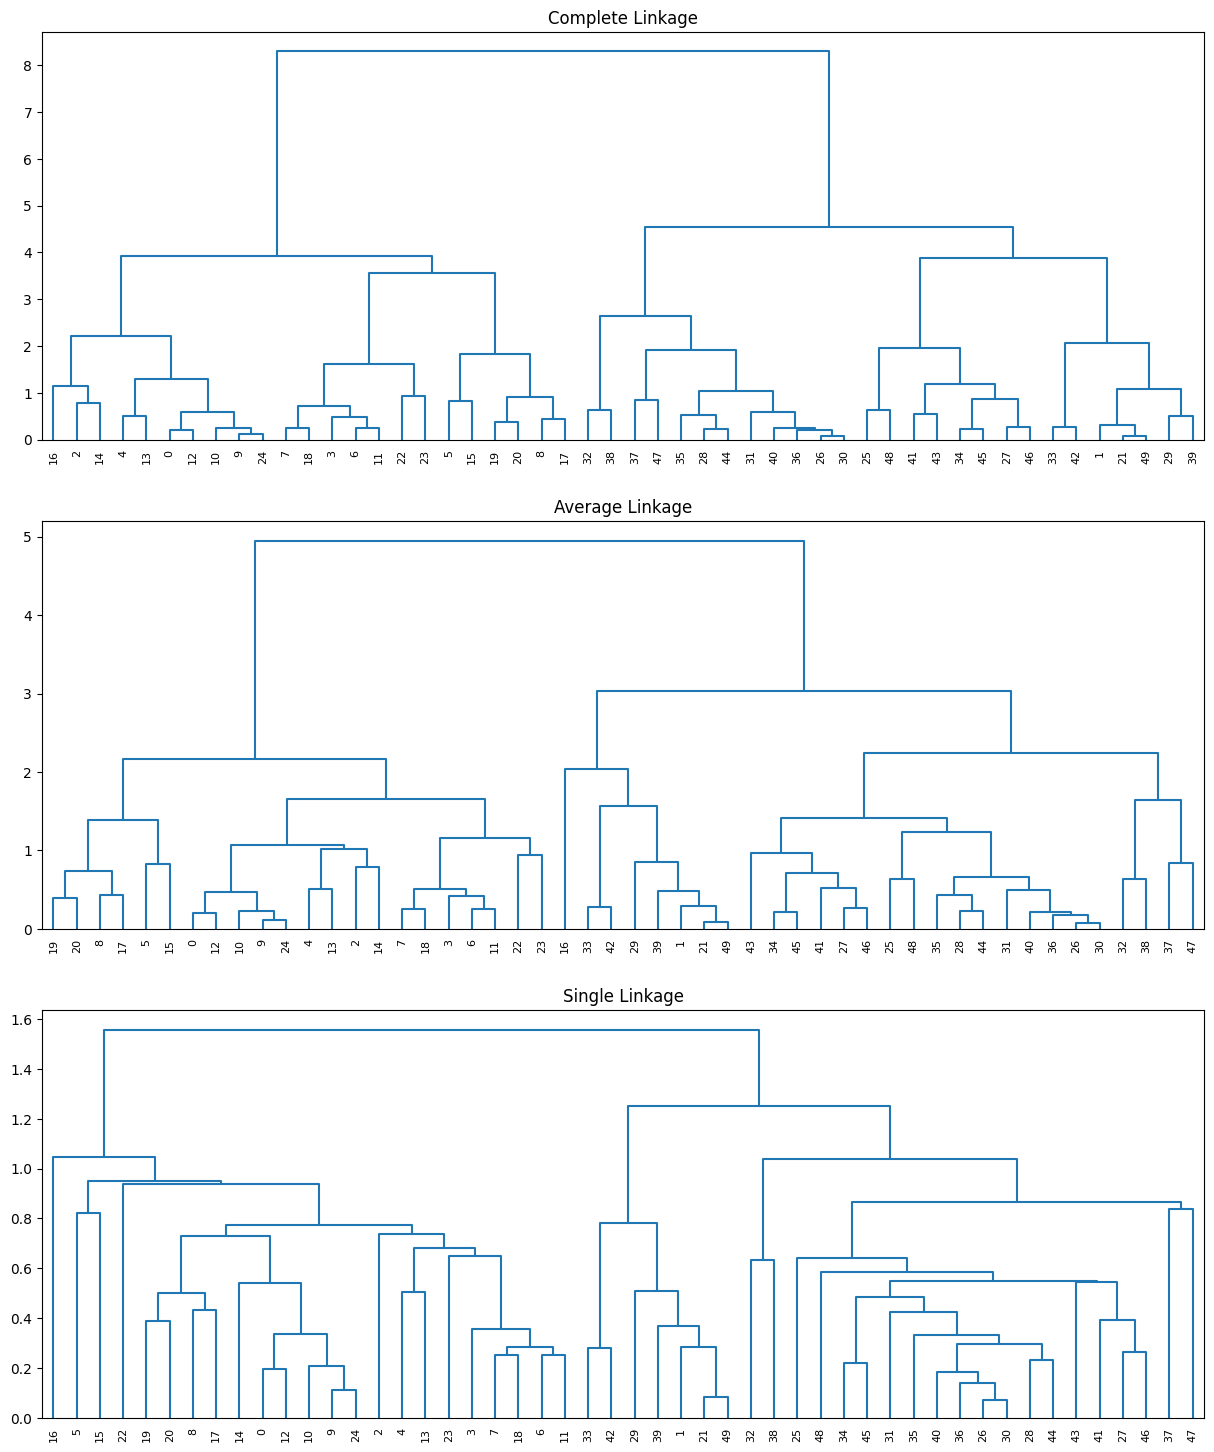

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

hierarchy.dendrogram(hierarchy.complete(X), ax=ax1, color_threshold=0)
hierarchy.dendrogram(hierarchy.average(X), ax=ax2, color_threshold=0)
hierarchy.dendrogram(hierarchy.single(X), ax=ax3, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')

If the size of the original observations is ```n```,

The hierarchy cluster is represented as a 2d-array: ```linkage[n - 1][4]```
* ```i```: ```i```th clustered linkage
* ```linkage[i][0]```, ```linkage[i][1]```: indices of the clustered linkages
* ```linkage[i][2]```: the distance between the clustered linkages
* ```linkage[i][3]```: the number of the original observations in this linkage

In [24]:
X_sample = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
hierarchy.average(X_sample)

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 1.        ,  8.        ,  1.        ,  3.        ],
       [ 9.        , 10.        ,  1.5       ,  4.        ],
       [ 3.        , 12.        ,  3.25      ,  5.        ],
       [11.        , 13.        ,  7.26666667,  8.        ]])

In [25]:
linkage = hierarchy.complete(X)

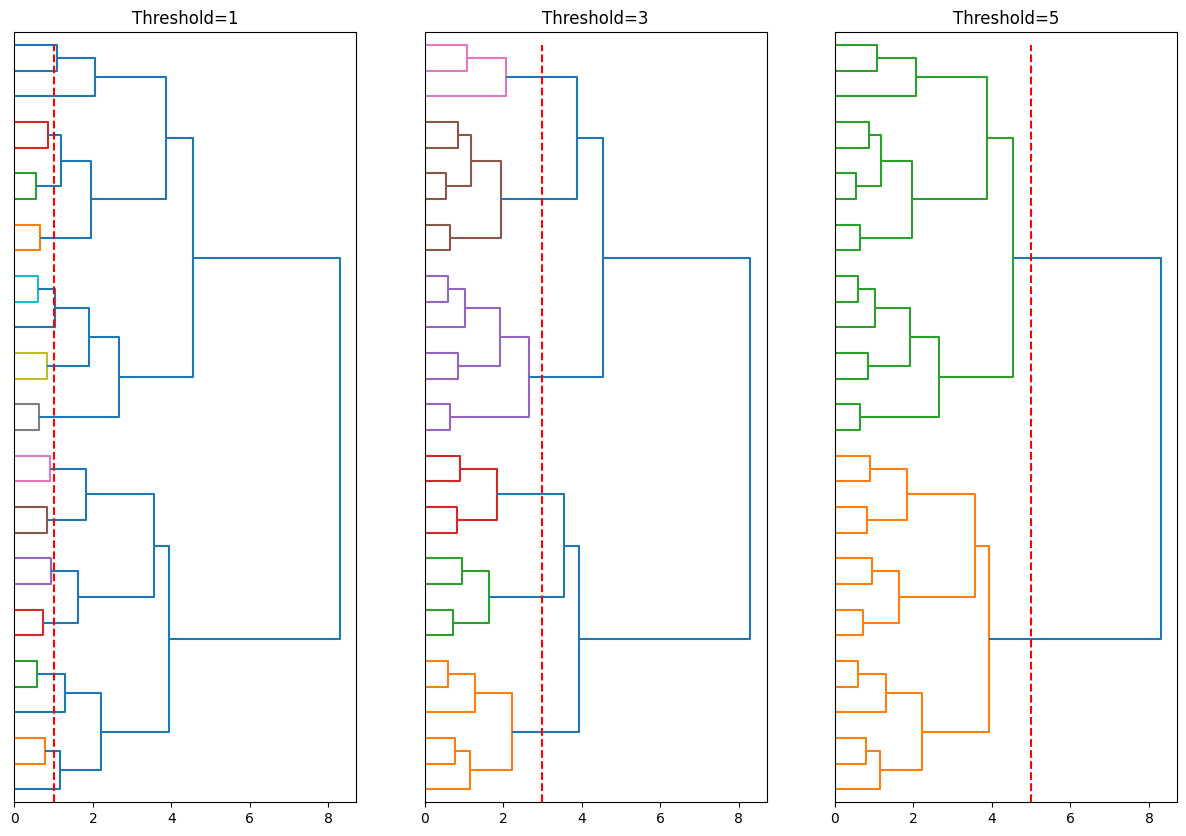

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

for ax, threshold in zip([ax1, ax2, ax3], [1, 3, 5]):
    hier = hierarchy.dendrogram(linkage, color_threshold=threshold, no_labels=True,
                                ax=ax, orientation='right', p=30, truncate_mode='lastp')
    ax.set_title('Threshold={}'.format(threshold))
    ax.vlines(threshold, 0, ax.yaxis.get_data_interval()[1], colors='r', linestyles='dashed')

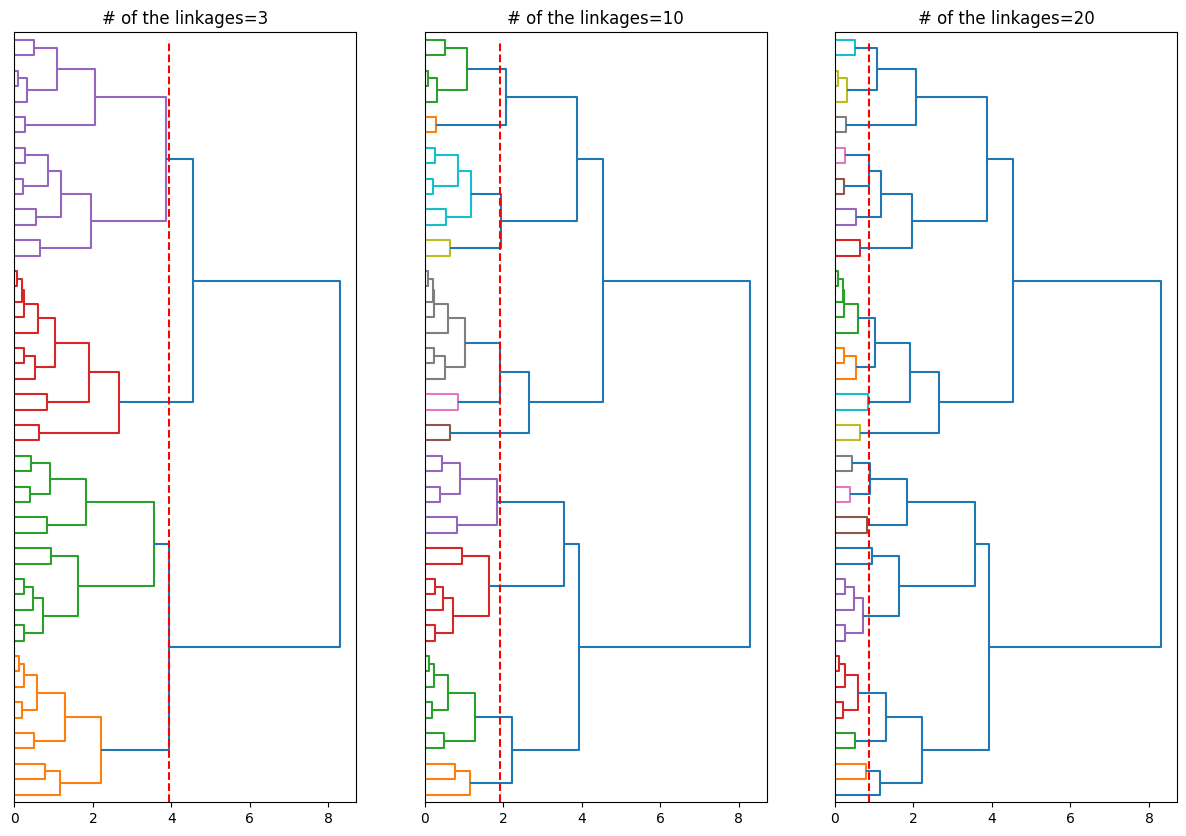

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

for ax, num_linkage in zip([ax1, ax2, ax3], [3, 10, 20]):

    threshold = linkage[X.shape[0] - num_linkage - 1][2]
    hier = hierarchy.dendrogram(linkage, color_threshold=threshold, no_labels=True,
                                ax=ax, orientation='right', p=num_linkage, truncate_mode='none')
    ax.set_title('# of the linkages={}'.format(num_linkage))
    ax.vlines(threshold, 0, ax.yaxis.get_data_interval()[1], colors='r', linestyles='dashed')

## 10.3: NCI60 Data Example

### PCA

In [28]:
df2 = pd.read_csv(f'{BASE_DIR}/Data/NCI60_X.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [29]:
y = pd.read_csv(f'{BASE_DIR}/Data/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y.head()

,type
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


In [30]:
X = pd.DataFrame(scale(df2))

In [31]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))
df2_plot.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14


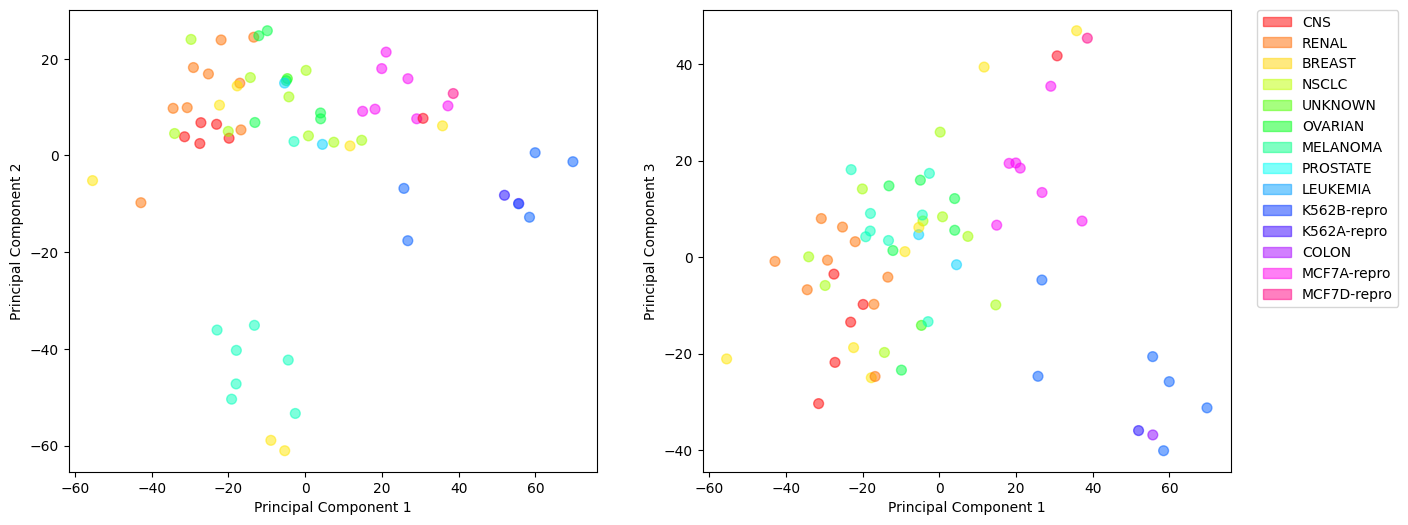

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:, 1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:, 2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')    

### Draw Proportion of Explained Variance of PCA Yourself!

<img src='https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/10-1.png' />

In [33]:
print(pca2.explained_variance_ratio_.shape)
print(np.cumsum(pca2.explained_variance_ratio_).shape)

(64,)
(64,)


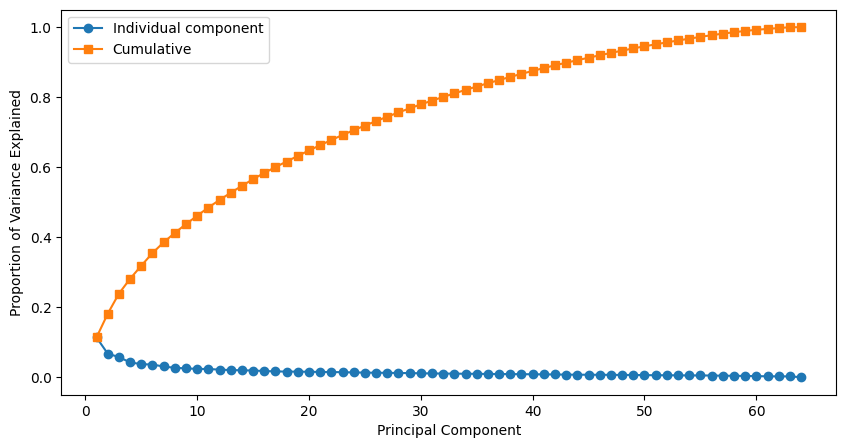

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_xlabel('# of the Principal Components')
ax.set_ylabel('Proportion of Variance Explained')
# TODO: Fill the graphs


xdims = np.arange(1, 65)
ax.plot(xdims, pca2.explained_variance_ratio_, '-o', label='Individual component')
ax.plot(xdims, np.cumsum(pca2.explained_variance_ratio_), '-s', label='Cumulative')

ax.set_ylabel('Proportion of Variance Explained')
ax.set_xlabel('Principal Component')
ax.legend(loc=2)